###  Import Libraries
This cell imports essential libraries for data manipulation (`pandas`, `numpy`), visualization (`seaborn`, `matplotlib`), and this cell loads the mutual fund dataset into a DataFrame and prints its shape to show the number of rows and columns.


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load mutual fund dataset
df = pd.read_csv("Morningstar - European Mutual Funds.csv")

# Show dataset shape and top rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (57603, 132)


,ticker,isin,fund_name,inception_date,category,rating,analyst_rating,risk_rating,performance_rating,investment_strategy,...,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down
0,0P00000BOW,LU0011983433,Morgan Stanley Investment Funds - Global Bond ...,1989-11-01,Global Bond,5.0,NaN,3.0,5.0,The Global Bond Fund's investment objective is...,...,-2.06,5.32,10.26,7.52,2.22,3.68,-7.67,3.27,16,7
1,0P00000ESH,LU0757425763,Threadneedle (Lux) - American Select Class AU ...,2000-07-28,US Large-Cap Growth Equity,2.0,NaN,3.0,2.0,The American Select Portfolio seeks to achieve...,...,8.94,8.33,8.67,0.46,8.85,-3.70,-4.42,5.90,17,6
2,0P00000ESL,LU0011818076,HSBC Global Investment Funds - Economic Scale ...,1987-01-16,Japan Large-Cap Equity,2.0,NaN,1.0,2.0,The sub-fund aims to provide long term total r...,...,6.77,13.15,7.59,-3.61,12.00,-8.66,-1.15,14.08,14,9
3,0P00000FI7,LU0152882725,Capital Group Global Equity Fund (LUX) B,2000-10-06,Global Large-Cap Growth Equity,2.0,NaN,2.0,2.0,Long-term capital growth through investment pr...,...,4.61,9.14,6.83,0.67,8.47,-6.78,-4.57,7.70,18,5
4,0P00000FIA,LU0114999294,Capital Group Global Equity Fund (LUX) B,2000-10-06,Global Large-Cap Growth Equity,2.0,NaN,2.0,2.0,Long-term capital growth through investment pr...,...,4.41,9.66,6.28,0.82,8.18,-6.99,-4.39,7.31,18,5


 ### Check Data Types and Visualize Missing Values
This cell examines the data types in the dataset and identifies the top 25 columns with missing values. It also visualizes the top 15 missing columns using a horizontal bar plot to assess the extent of missingness across features. This helps determine which columns need to be imputed or removed in preprocessing.


Column Types:
float64    108
object      22
int64        2
Name: count, dtype: int64

Top columns with missing values:
analyst_rating                    49874
modified_duration                 47474
effective_maturity                44704
bond_credit_quality               42595
bond_interest_rate_sensitivity    42595
credit_bbb                        41102
credit_bb                         41102
credit_aaa                        41102
credit_aa                         41102
credit_a                          41102
credit_not_rated                  41102
credit_below_b                    41102
credit_b                          41102
average_credit_quality            41094
fund_trailing_return_10years      40165
dividend_frequency                31196
sector_utilities                  31156
sector_energy                     30159
sector_real_estate                29340
holdings_n_bonds                  28813
average_coupon_rate               28218
fund_return_2015                  27003
e

C:\Users\Aditya\AppData\Local\Temp\ipykernel_3284\2623024940.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.head(15).values, y=missing.head(15).index, palette='Reds_r')


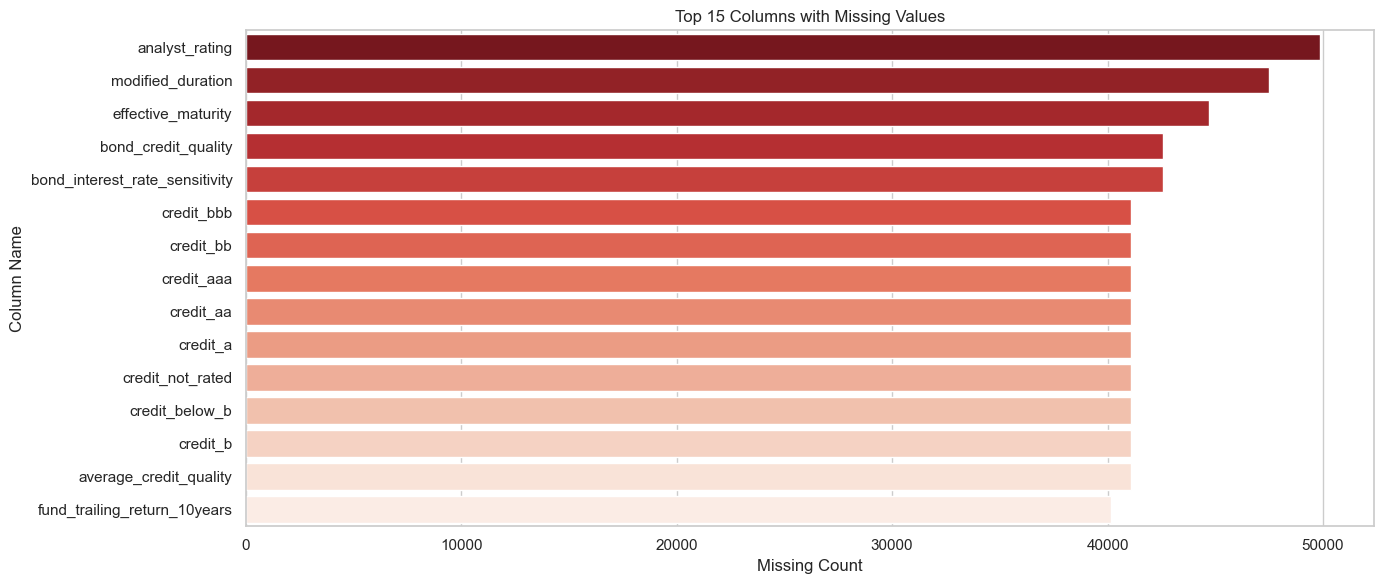

In [47]:
# Check data types
print("Column Types:")
print(df.dtypes.value_counts())

# Check for missing values (Top 25)
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("\nTop columns with missing values:")
print(missing.head(25))

# Bar plot to visualize missingness
plt.figure(figsize=(14, 6))
sns.barplot(x=missing.head(15).values, y=missing.head(15).index, palette='Reds_r')
plt.title("Top 15 Columns with Missing Values")
plt.xlabel("Missing Count")
plt.ylabel("Column Name")
plt.tight_layout()
plt.show()


###  Visualize Fund Ratings and 2016 Return Distributions
This cell creates visualizations to understand key categorical and numerical variables:

- The first part uses count plots to display the distribution of three categorical features: `rating`, `risk_rating`, and `performance_rating`.
- The second part visualizes the distribution of mutual fund returns for each quarter of 2016 using KDE (Kernel Density Estimate) plots. This helps assess the spread, skewness, and central tendency of returns over the year.


C:\Users\Aditya\AppData\Local\Temp\ipykernel_3284\502116738.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='crest')
C:\Users\Aditya\AppData\Local\Temp\ipykernel_3284\502116738.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='crest')
C:\Users\Aditya\AppData\Local\Temp\ipykernel_3284\502116738.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='crest')


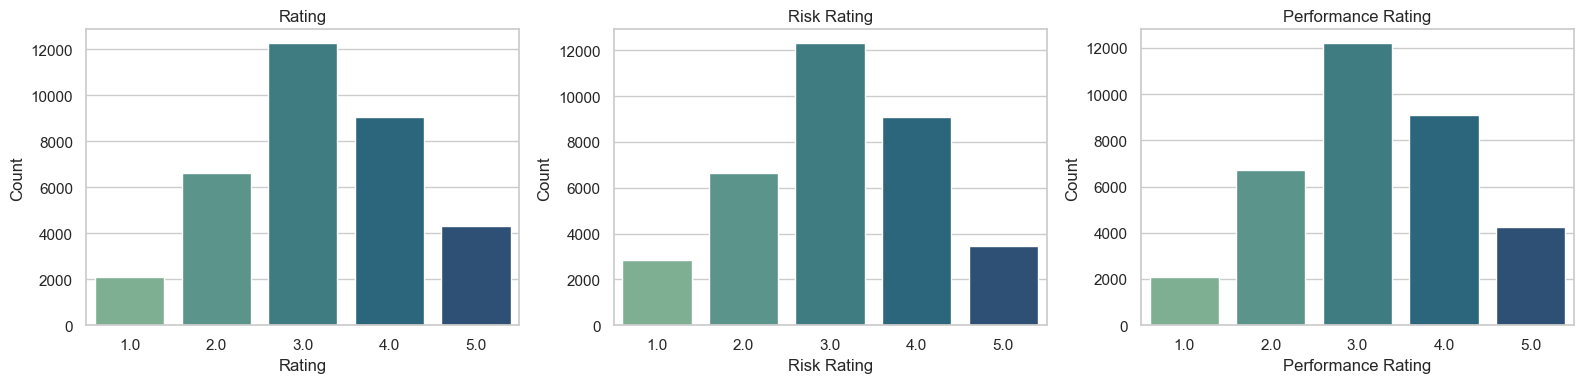

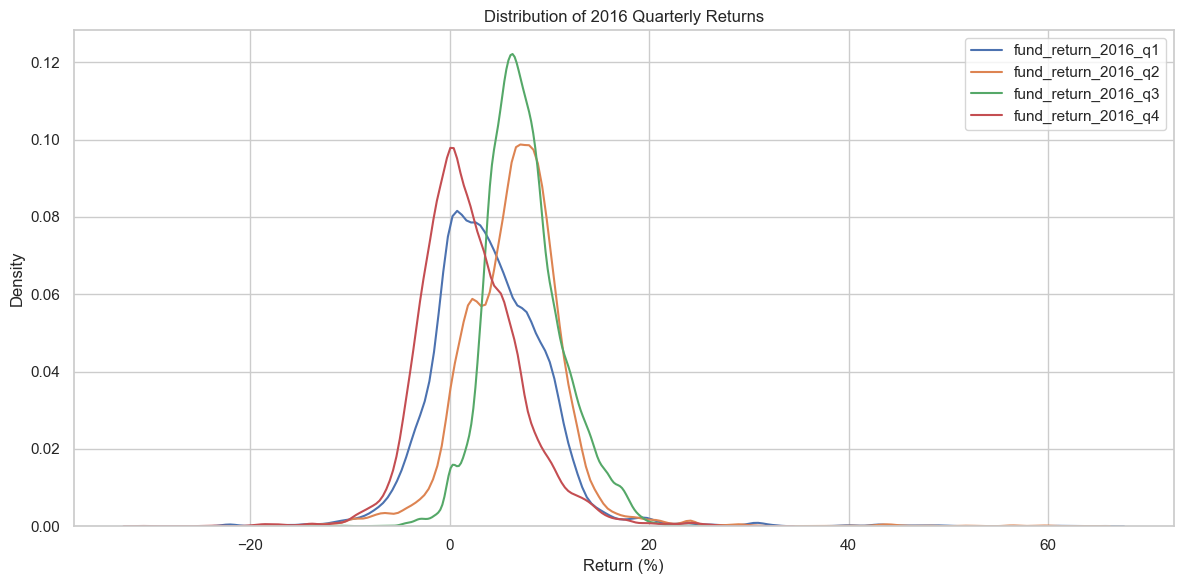

In [48]:
# Plot distribution of fund rating, risk rating, and performance rating
rating_cols = ['rating', 'risk_rating', 'performance_rating']

plt.figure(figsize=(16, 4))
for i, col in enumerate(rating_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=col, palette='crest')
    plt.title(f'{col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Plot distribution of quarterly returns in 2016
return_cols_2016 = [
    'fund_return_2016_q1', 'fund_return_2016_q2',
    'fund_return_2016_q3', 'fund_return_2016_q4'
]

plt.figure(figsize=(12, 6))
for col in return_cols_2016:
    sns.kdeplot(df[col], label=col)
plt.title('Distribution of 2016 Quarterly Returns')
plt.xlabel('Return (%)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


###  Detect Outliers in Quarterly Returns Using Boxplot
This cell generates a boxplot for all four quarters of 2016 mutual fund returns. Boxplots are useful for identifying outliers, distribution spread, and median values. This step helps assess the presence of extreme return values that could influence model training.


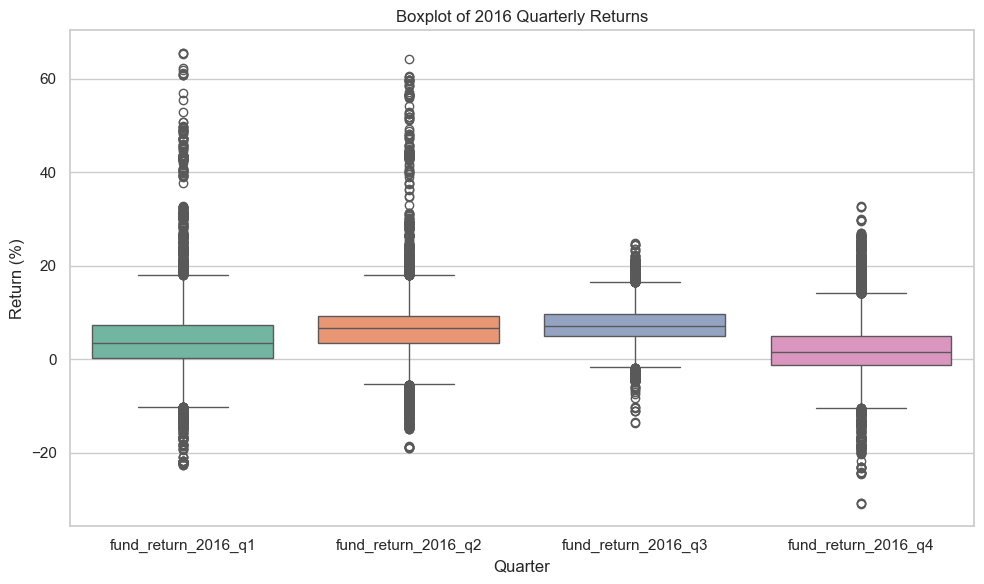

In [49]:
# Boxplot for all 2016 quarterly returns to spot outliers
q_returns = ['fund_return_2016_q1', 'fund_return_2016_q2',
             'fund_return_2016_q3', 'fund_return_2016_q4']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[q_returns], palette='Set2')
plt.title("Boxplot of 2016 Quarterly Returns")
plt.ylabel("Return (%)")
plt.xlabel("Quarter")
plt.tight_layout()
plt.show()


###  Feature Engineering – Return Metrics for 2016
This cell creates three key financial features for each mutual fund:

- `avg_quarterly_return_2016`: The average return across all four quarters in 2016. This is used as the **target variable** for prediction.
- `volatility_2016`: The standard deviation of quarterly returns, representing risk or variability.
- `return_volatility_ratio_2016`: A Sharpe-like ratio that captures risk-adjusted return by dividing the average return by volatility.

Finally, it summarizes these new features using the `.describe()` method.


In [50]:
# Average return for 2016 (target variable)
df['avg_quarterly_return_2016'] = df[
    ['fund_return_2016_q1', 'fund_return_2016_q2',
     'fund_return_2016_q3', 'fund_return_2016_q4']
].mean(axis=1)

# Volatility of 2016 returns
df['volatility_2016'] = df[
    ['fund_return_2016_q1', 'fund_return_2016_q2',
     'fund_return_2016_q3', 'fund_return_2016_q4']
].std(axis=1)

# Risk-adjusted return (Sharpe-like ratio)
df['return_volatility_ratio_2016'] = df['avg_quarterly_return_2016'] / df['volatility_2016']

# Check the new features
df[['avg_quarterly_return_2016', 'volatility_2016', 'return_volatility_ratio_2016']].describe()


,avg_quarterly_return_2016,volatility_2016,return_volatility_ratio_2016
count,39515.000000,38529.000000,3.851700e+04
mean,4.905355,4.682201,inf
std,2.795998,2.833724,NaN
min,-18.340000,0.000000,-4.548181e+00
25%,3.402500,2.968247,7.384307e-01
50%,4.955000,4.138522,1.105734e+00
75%,6.340000,5.796255,1.691879e+00
max,32.580000,45.471944,inf


### Visualize Engineered Features Using Histograms
This cell creates histograms with KDE (density) overlays for the three engineered features:

- `avg_quarterly_return_2016`
- `volatility_2016`
- `return_volatility_ratio_2016`

These plots help assess the distribution shape, skewness, and spread of each variable. This is important for understanding model input behavior and identifying potential transformations if needed.


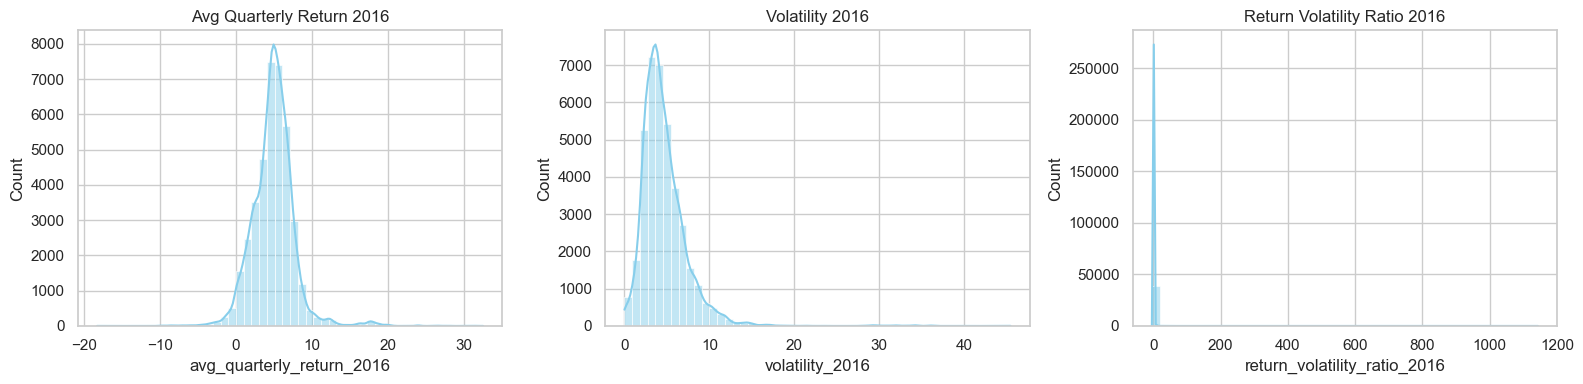

In [51]:
# Histograms of the engineered features
cols_to_plot = ['avg_quarterly_return_2016', 'volatility_2016', 'return_volatility_ratio_2016']

plt.figure(figsize=(16, 4))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], bins=50, kde=True, color='skyblue')
    plt.title(col.replace("_", " ").title())
plt.tight_layout()
plt.show()


###  Handle Infinite and Missing Values in Engineered Features
This cell performs final cleaning on the engineered features:

- Replaces any infinite values (`inf`, `-inf`) with `NaN` to maintain consistency.
- Drops rows that contain missing values in the key features: `avg_quarterly_return_2016`, `volatility_2016`, and `return_volatility_ratio_2016`.
- Finally, prints the updated shape of the cleaned dataset.

This ensures the dataset is ready for modeling without any invalid values.


In [52]:
# Replace inf with NaN first (for consistency)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any NaNs in key columns
df = df.dropna(subset=[
    'avg_quarterly_return_2016',
    'volatility_2016',
    'return_volatility_ratio_2016'
])

# Check the shape after cleaning
print("✅ Cleaned dataset shape:", df.shape)


✅ Cleaned dataset shape: (38513, 135)


###  Group and One-Hot Encode Fund Categories
This cell processes the fund category column to prepare it for modeling:

- Identifies the top 5 most frequent fund categories.
- Groups all other rare categories under a new label: `"Other"`.
- Applies one-hot encoding to the grouped category column to convert it into numeric format for ML models.
- Displays the resulting one-hot encoded columns using `.filter()`.

This reduces high cardinality and prepares categorical features for use in algorithms like Random Forest and XGBoost.


In [53]:
# Count top 5 fund categories
top_categories = df['category'].value_counts().nlargest(5).index.tolist()

# Create a new column with "Other" for rare categories
df['category_grouped'] = df['category'].apply(lambda x: x if x in top_categories else "Other")

# One-hot encode the grouped category column
df = pd.get_dummies(df, columns=['category_grouped'], prefix='cat', drop_first=True)

# Show encoded category columns
df.filter(like='cat_').head()


,cat_Global Emerging Markets Equity,cat_Global Large-Cap Blend Equity,cat_Other,cat_Other Bond,cat_Other Equity
0,False,False,True,False,False
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,True,False,False


###  Convert Rating Columns to Numeric and Handle Missing Values
This cell ensures that all rating-related columns are in numeric format:

- Converts `rating`, `risk_rating`, and `performance_rating` to numeric, coercing any invalid entries (like strings or symbols) to `NaN`.
- Drops rows that have missing values in any of the rating columns.
- Displays a statistical summary to confirm that the columns are now clean and numerical.

This step ensures that the rating features are usable for machine learning models.


In [54]:
# Convert ratings to numeric (force errors to NaN)
rating_cols = ['rating', 'risk_rating', 'performance_rating']
for col in rating_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in any rating
df.dropna(subset=rating_cols, inplace=True)

# Confirm they’re all numeric now
df[rating_cols].describe()


,rating,risk_rating,performance_rating
count,30552.000000,30552.000000,30552.000000
mean,3.195503,3.125360,3.194292
std,1.072405,1.078714,1.068635
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000


###  Final Data Cleaning and Imputation
This cell performs multiple crucial data-cleaning steps to prepare the dataset for modeling:

1. Replaces all infinite values with `NaN`.
2. Drops rows with missing values in key engineered features and rating columns to ensure model compatibility.
3. Drops columns that have more than 40% missing values (threshold-based filtering).
4. Fills remaining missing values in all numeric columns using median imputation — a robust choice against outliers.
5. Finally, it prints the total number of missing values to confirm the dataset is fully cleaned.

This step ensures a clean, consistent dataset for training accurate machine learning models.


In [55]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(subset=[
    'avg_quarterly_return_2016',
    'volatility_2016',
    'return_volatility_ratio_2016'
])


In [56]:
for col in rating_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=rating_cols, inplace=True)


In [57]:
# 1. Drop columns with more than 40% missing values
threshold = len(df) * 0.6
df = df.dropna(thresh=threshold, axis=1)

# 2. Fill remaining numeric columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 3. Double check for any remaining missing values
print("✅ Total remaining missing values:", df.isnull().sum().sum())


✅ Total remaining missing values: 41425


###  Drop Remaining Missing Values and Confirm Final Dataset Shape
This cell performs a final cleanup to ensure complete data integrity:

- Drops any remaining rows that contain missing values.
- Prints the total count of missing values (should be zero).
- Displays the final shape of the cleaned dataset.

This step guarantees that the dataset is 100% ready for machine learning model training without any null-related issues.


In [58]:
# Drop all remaining rows with any missing value (final cleanup)
df.dropna(inplace=True)

# Confirm zero missing values
print("✅ Missing values left after final cleanup:", df.isnull().sum().sum())
print("✅ Final dataset shape:", df.shape)


✅ Missing values left after final cleanup: 0
✅ Final dataset shape: (13398, 119)


###  Define Features and Split Dataset for Modeling
This cell prepares the dataset for machine learning:

- Sets `avg_quarterly_return_2016` as the target variable.
- Excludes identifier and date columns (`ticker`, `isin`, `fund_name`, `inception_date`) from the feature set.
- Splits the dataset into features (`X`) and target (`y`).
- Performs an 80/20 train-test split using `train_test_split`.

This ensures a clear separation of training and evaluation data to assess model performance fairly.


In [59]:
from sklearn.model_selection import train_test_split

# Define target and features
target = 'avg_quarterly_return_2016'

# Select features (excluding ID columns and target)
ignore_cols = ['ticker', 'isin', 'fund_name', 'inception_date', target]
features = [col for col in df.columns if col not in ignore_cols]

# Split into X and y
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Confirm shapes
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


X_train: (10718, 114)
X_test : (2680, 114)
y_train: (10718,)
y_test : (2680,)


###  Filter Only Numeric Features and Re-Split Dataset
This cell ensures that only numeric features are used for model training:

- Filters the feature set (`X`) to include only numeric columns, excluding any remaining object or categorical types.
- Reapplies the train-test split to reflect the updated `X`.
- Prints the data types and shape of `X_train` to confirm it’s fully numeric and ready for modeling.

This step prevents errors during model training and ensures compatibility with ML algorithms that require numerical input.


In [61]:
# Rebuild X with only numeric columns
X = df[features].select_dtypes(include=[np.number])

# Update train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Confirm it's clean now
print("✅ X_train types:", X_train.dtypes.unique())
print("✅ X_train shape:", X_train.shape)


✅ X_train types: [dtype('float64') dtype('int64')]
✅ X_train shape: (10718, 95)


### 🔹 Cell X: Train and Evaluate Random Forest Regressor (Baseline Model)
This cell builds a baseline regression model using the Random Forest algorithm:

- Trains a `RandomForestRegressor` with 100 decision trees.
- Predicts fund returns on the test set.
- Evaluates performance using RMSE (Root Mean Squared Error) and R² Score.

This provides a benchmark to compare against more advanced or tuned models like XGBoost.


In [62]:
# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 RMSE: {rmse:.4f}")
print(f"📈 R² Score: {r2:.4f}")


📊 RMSE: 0.2429
📈 R² Score: 0.9927


###  Visualize Random Forest Predictions and Residuals
This cell provides visual evaluation of the Random Forest model:

- **Left Plot**: A scatter plot comparing actual vs predicted returns. The red dashed line represents perfect prediction. Closer points to the line indicate better accuracy.
- **Right Plot**: A histogram of residuals (prediction errors) with a KDE overlay. A symmetric distribution centered around zero indicates unbiased predictions.

These plots help assess prediction accuracy and identify any systematic errors or outliers.


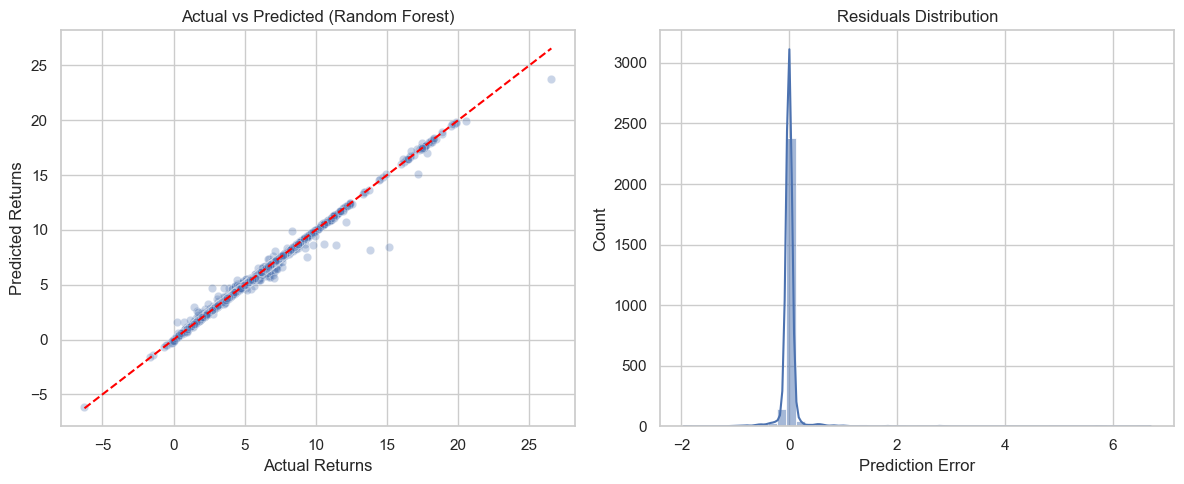

In [63]:
# Visualize predicted vs actual
plt.figure(figsize=(12, 5))

# 1. Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Returns")
plt.ylabel("Predicted Returns")
plt.title("Actual vs Predicted (Random Forest)")

# 2. Residuals
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=50, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")

plt.tight_layout()
plt.show()


###  Visualize Feature Importance from Random Forest Model
This cell extracts and visualizes the top 15 most important features identified by the trained Random Forest model:

- Uses the model’s built-in `feature_importances_` attribute to compute how much each feature contributes to predictions.
- Creates a bar plot to rank features based on their importance scores.

This helps interpret which input variables have the most influence on mutual fund return prediction.


C:\Users\Aditya\AppData\Local\Temp\ipykernel_3284\2837023783.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')


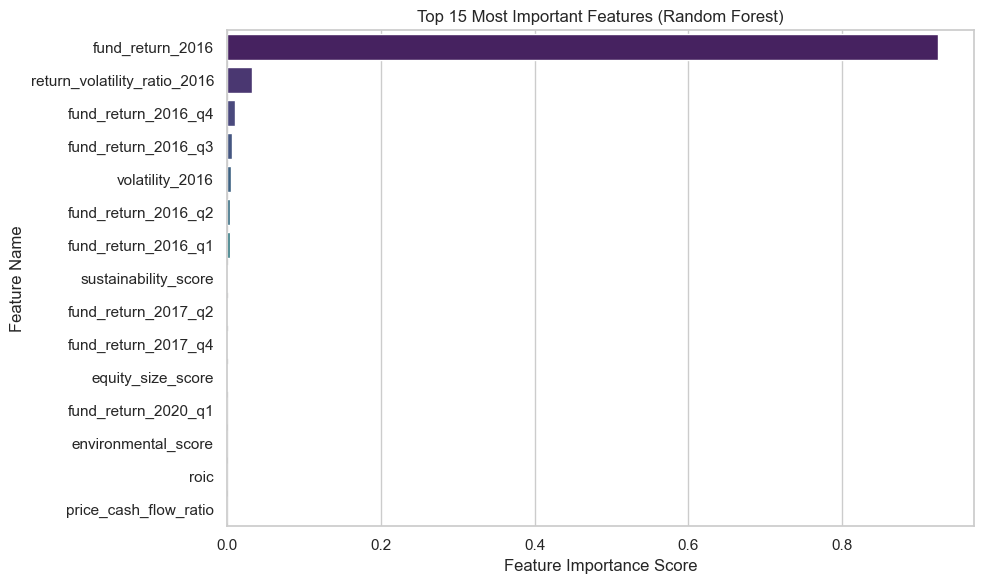

In [64]:
# Get feature importances from trained RF model
importances = rf.feature_importances_
features_list = X_train.columns

# Create a DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': features_list,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')
plt.title('Top 15 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()


###  Define Optuna Objective Function for Random Forest Hyperparameter Tuning
This cell defines the objective function for **Optuna** to tune the hyperparameters of the Random Forest model:

- Parameters tuned include `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`, and `bootstrap`.
- The function evaluates the model's performance using **RMSE (Root Mean Squared Error)**.
- Optuna will optimize these parameters by minimizing RMSE during its search.

This function will be used by Optuna to run multiple trials and find the best hyperparameter combination.


In [66]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the Optuna objective function
def rf_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }

    model = RandomForestRegressor(random_state=42, **params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    return rmse


###  Run Optuna to Tune Random Forest Hyperparameters
This cell creates and runs the **Optuna study** to find the best hyperparameters for the Random Forest model:

- It uses the **TPE sampler** (Tree-structured Parzen Estimator) to search the hyperparameter space.
- Runs **30 trials** to optimize the parameters defined in the `rf_objective` function.
- Displays the best RMSE and the best set of hyperparameters found by Optuna.

This step ensures that Random Forest is fine-tuned for optimal performance.


In [67]:
from optuna.samplers import TPESampler

# Create and run the Optuna study
rf_study = optuna.create_study(
    direction='minimize',
    sampler=TPESampler(seed=42)
)
rf_study.optimize(rf_objective, n_trials=30)

# Display the best result
print("🔍 Best RMSE from Random Forest:", rf_study.best_value)
print("🏆 Best Hyperparameters:")
for key, value in rf_study.best_params.items():
    print(f"  {key}: {value}")


[I 2025-04-05 08:31:44,226] A new study created in memory with name: no-name-ba2426c0-dca5-4e43-9064-ee54cf833cc2
C:\Users\Aditya\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-04-05 08:32:06,804] Trial 0 finished with value: 0.40345129027890403 and parameters: {'n_estimators': 250, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.40345129027890403.
C:\Users\Aditya\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-04-05 08:32:33,071] Trial 1 finished with value: 

🔍 Best RMSE from Random Forest: 0.3167364167508459
🏆 Best Hyperparameters:
  n_estimators: 173
  max_depth: 18
  min_samples_split: 4
  min_samples_leaf: 1
  max_features: sqrt
  bootstrap: False


###  Retrain and Evaluate Random Forest with Best Hyperparameters
This cell retrains the **Random Forest** model using the best hyperparameters found by Optuna:

- **Retrains** the model with `best_rf_params` from the Optuna study.
- **Predicts** fund returns on the test set and evaluates performance using **RMSE** and **R²** metrics.
- Prints the final RMSE and R² score, indicating the improvement after hyperparameter tuning.

This step confirms the improvement in model accuracy after tuning.


In [68]:
# Extract best parameters from Optuna
best_rf_params = rf_study.best_params

# Retrain Random Forest using best params
best_rf = RandomForestRegressor(random_state=42, **best_rf_params)
best_rf.fit(X_train, y_train)

# Predict and evaluate
rf_tuned_preds = best_rf.predict(X_test)
rf_tuned_rmse = mean_squared_error(y_test, rf_tuned_preds, squared=False)
rf_tuned_r2 = r2_score(y_test, rf_tuned_preds)

# Print results
print(f"📈 Final Tuned RF RMSE: {rf_tuned_rmse:.4f}")
print(f"📊 Final Tuned RF R² Score: {rf_tuned_r2:.4f}")


📈 Final Tuned RF RMSE: 0.3167
📊 Final Tuned RF R² Score: 0.9875


C:\Users\Aditya\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


###  Visualize Feature Importance from Tuned Random Forest Model
This cell extracts and visualizes the top 15 most important features from the **tuned Random Forest model**:

- It uses the `feature_importances_` attribute of the trained model to rank features by their contribution to the predictions.
- A bar plot is generated to display the importance scores of each feature.

This visualization helps identify which variables are most influential in predicting mutual fund returns after hyperparameter tuning.


C:\Users\Aditya\AppData\Local\Temp\ipykernel_3284\826473969.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=tuned_feat_imp_df.head(15), palette='coolwarm')


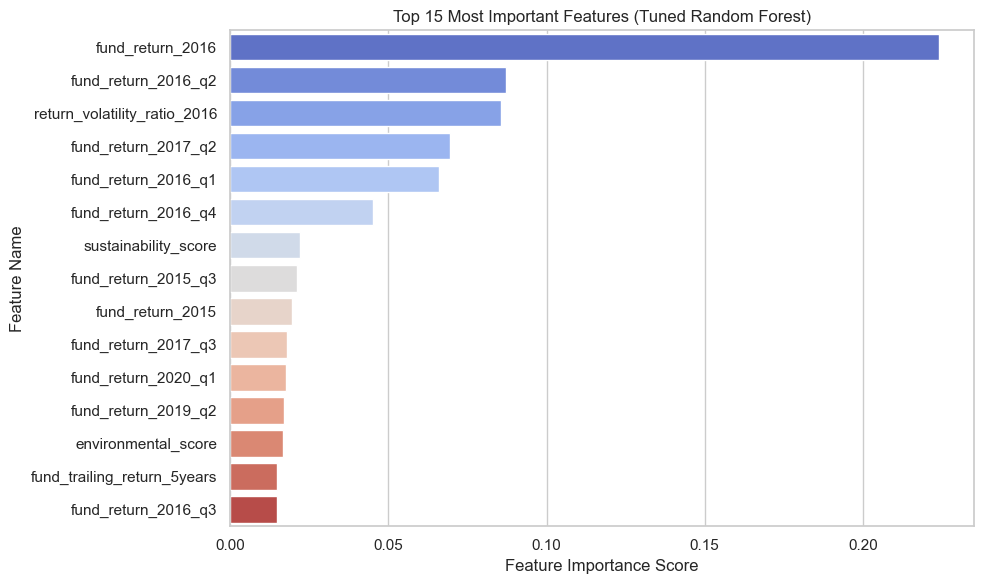

In [69]:
# Get feature importances from the tuned RF model
tuned_rf_importances = best_rf.feature_importances_
tuned_features_list = X_train.columns

# Create a DataFrame for visualization
tuned_feat_imp_df = pd.DataFrame({
    'Feature': tuned_features_list,
    'Importance': tuned_rf_importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=tuned_feat_imp_df.head(15), palette='coolwarm')
plt.title('Top 15 Most Important Features (Tuned Random Forest)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()


###  Train and Evaluate XGBoost Model with Default Hyperparameters
This cell trains the **XGBoost** model using the default hyperparameters:

- The `objective='reg:squarederror'` is specified for regression tasks.
- The model is trained on the `X_train` data and evaluated on the `X_test` set.
- The performance is measured using **RMSE** and **R² Score**.

This step provides a baseline performance of XGBoost, which will later be tuned for better accuracy.


In [70]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Train XGBoost with default hyperparameters
xgb_base = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_base.fit(X_train, y_train)

# Predict on test set
xgb_base_preds = xgb_base.predict(X_test)

# Evaluate model
xgb_base_rmse = mean_squared_error(y_test, xgb_base_preds, squared=False)
xgb_base_r2 = r2_score(y_test, xgb_base_preds)

# Print results
print(f"🟧 XGBoost (Default) RMSE: {xgb_base_rmse:.4f}")
print(f"🟨 XGBoost (Default) R² Score: {xgb_base_r2:.4f}")


🟧 XGBoost (Default) RMSE: 0.2462
🟨 XGBoost (Default) R² Score: 0.9925


C:\Users\Aditya\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


###  Define Optuna Objective Function for XGBoost Hyperparameter Tuning
This cell defines the objective function used by **Optuna** to optimize **XGBoost** hyperparameters:

- Tuning parameters include `lambda`, `alpha`, `colsample_bytree`, `subsample`, `learning_rate`, `n_estimators`, `max_depth`, and `min_child_weight`.
- The model is trained and evaluated based on RMSE (Root Mean Squared Error) for performance.
- Optuna will minimize RMSE to find the best hyperparameter combination.

This setup allows Optuna to perform automated hyperparameter optimization for XGBoost.


In [71]:
import optuna
from optuna.samplers import TPESampler

# Objective function for tuning XGBoost
def xgb_objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'booster': 'gbtree',
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 600),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train, verbose=0)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    return rmse


###  Run Optuna to Tune XGBoost Hyperparameters
This cell creates and runs an **Optuna study** to optimize XGBoost hyperparameters:

- It uses the **TPE sampler** (Tree-structured Parzen Estimator) to search the hyperparameter space.
- Runs **30 trials** to find the best hyperparameters, minimizing RMSE.
- Displays the best RMSE and the optimal set of hyperparameters found by Optuna.

This allows us to find the best configuration for XGBoost, enhancing model performance.


In [72]:
# Create and run the Optuna study for XGBoost
xgb_study = optuna.create_study(
    direction='minimize',
    sampler=TPESampler(seed=42)
)
xgb_study.optimize(xgb_objective, n_trials=30)

# Display the best result
print("🔍 Best RMSE from XGBoost:", xgb_study.best_value)
print("🏆 Best Hyperparameters:")
for key, value in xgb_study.best_params.items():
    print(f"  {key}: {value}")


[I 2025-04-05 08:47:04,953] A new study created in memory with name: no-name-023307e1-2ab5-4af3-965b-18bd16e0a4d5
C:\Users\Aditya\AppData\Local\Temp\ipykernel_3284\909139824.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
C:\Users\Aditya\AppData\Local\Temp\ipykernel_3284\909139824.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
C:\Users\Aditya\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use th

🔍 Best RMSE from XGBoost: 0.2084277675281511
🏆 Best Hyperparameters:
  lambda: 2.4998420357521005
  alpha: 0.002592989163257556
  colsample_bytree: 0.5493839988867333
  subsample: 0.9982288799366813
  learning_rate: 0.26892305292395235
  n_estimators: 503
  max_depth: 7
  min_child_weight: 6


###  Retrain and Evaluate XGBoost with Best Hyperparameters
This cell retrains the **XGBoost model** using the best hyperparameters found by Optuna:

- **Retrains** the model with `best_xgb_params` from the Optuna study.
- **Predicts** the fund returns on the test set and evaluates performance using **RMSE** and **R² Score**.
- Prints the final RMSE and R², reflecting the performance improvement after hyperparameter tuning.

This step confirms the enhanced performance of XGBoost with tuned parameters.


In [73]:
# Get best parameters from Optuna study
best_xgb_params = xgb_study.best_params
best_xgb_params.update({
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
})

# Retrain XGBoost with best params
xgb_tuned = xgb.XGBRegressor(**best_xgb_params)
xgb_tuned.fit(X_train, y_train)

# Predict and evaluate
xgb_tuned_preds = xgb_tuned.predict(X_test)
xgb_tuned_rmse = mean_squared_error(y_test, xgb_tuned_preds, squared=False)
xgb_tuned_r2 = r2_score(y_test, xgb_tuned_preds)

# Print results
print(f"🎯 Final XGBoost (Tuned) RMSE: {xgb_tuned_rmse:.4f}")
print(f"🚀 Final XGBoost (Tuned) R² Score: {xgb_tuned_r2:.4f}")


🎯 Final XGBoost (Tuned) RMSE: 0.2084
🚀 Final XGBoost (Tuned) R² Score: 0.9946


C:\Users\Aditya\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


###  Visualize XGBoost Predictions and Residuals
This cell provides visual evaluation of the tuned XGBoost model:

- **Left Plot**: A scatter plot comparing the actual vs predicted returns. The red dashed line represents the ideal prediction, and closer points to the line indicate better accuracy.
- **Right Plot**: A histogram of residuals (prediction errors) with a KDE overlay. A centered, symmetric distribution around zero indicates a good fit without bias.

These plots help assess the prediction quality and identify any systematic errors or outliers.


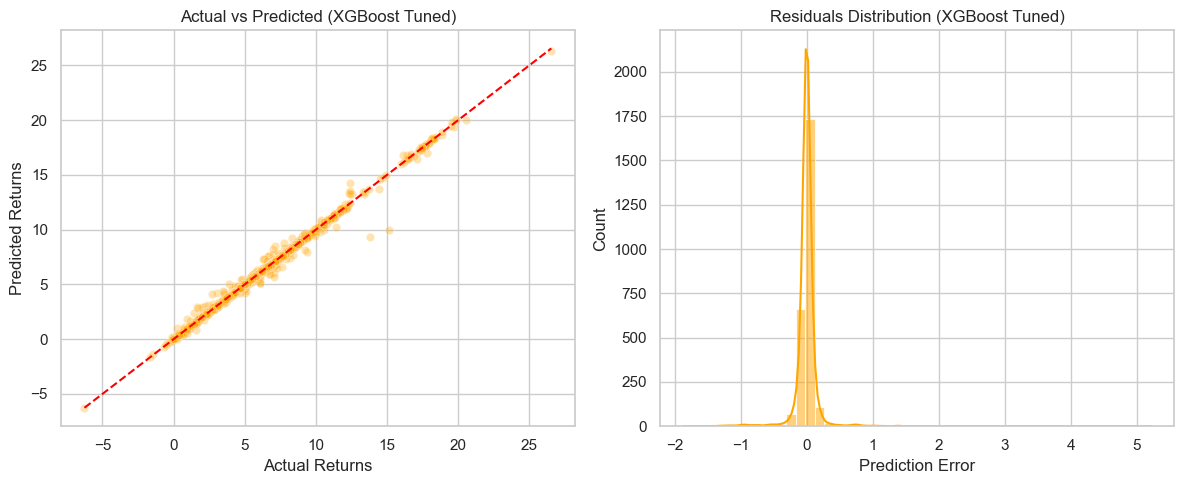

In [74]:
# Plot: Actual vs Predicted and Residuals for XGBoost
plt.figure(figsize=(12, 5))

# 1. Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=xgb_tuned_preds, alpha=0.3, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Returns")
plt.ylabel("Predicted Returns")
plt.title("Actual vs Predicted (XGBoost Tuned)")

# 2. Residuals Distribution
residuals_xgb = y_test - xgb_tuned_preds
plt.subplot(1, 2, 2)
sns.histplot(residuals_xgb, bins=50, kde=True, color='orange')
plt.title("Residuals Distribution (XGBoost Tuned)")
plt.xlabel("Prediction Error")

plt.tight_layout()
plt.show()


### 🔹 Cell X: Visualize Feature Importance from Tuned XGBoost Model
This cell extracts and visualizes the top 15 most important features from the **tuned XGBoost model**:

- It uses the `feature_importances_` attribute to rank features by their contribution to the model’s predictions.
- A bar plot is created to display the importance scores of each feature.

This visualization helps identify which variables have the most influence on predicting mutual fund returns with XGBoost.


C:\Users\Aditya\AppData\Local\Temp\ipykernel_3284\2155459348.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=xgb_importance_df.head(15), palette='YlOrBr')


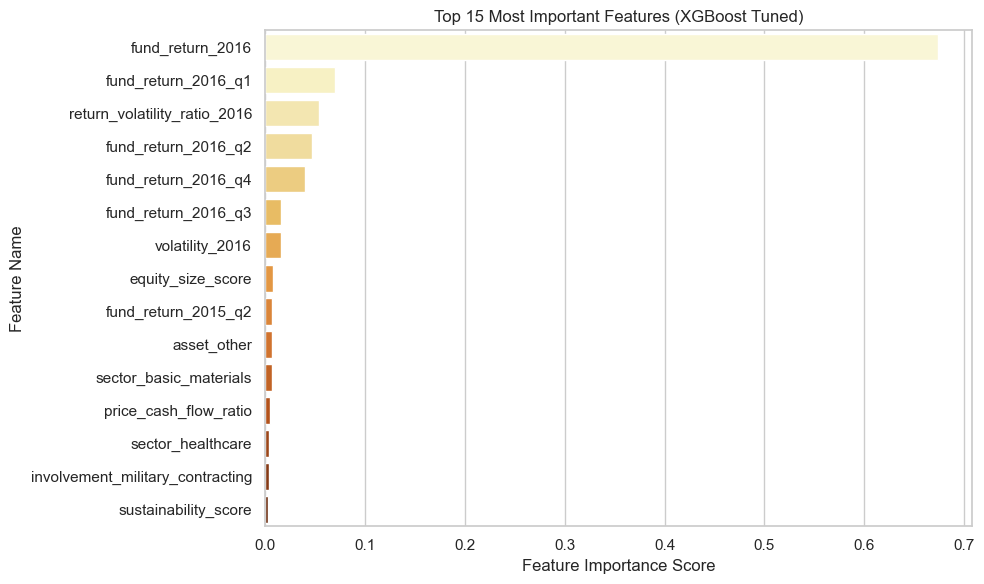

In [75]:
# Get feature importances from the tuned XGBoost model
xgb_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_tuned.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 15 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df.head(15), palette='YlOrBr')
plt.title('Top 15 Most Important Features (XGBoost Tuned)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()


###  Final Comparison of All Models
This cell creates a comparison table to evaluate the performance of the following models:

- **Random Forest (Default)**: The baseline Random Forest model.
- **Random Forest (Tuned)**: The Random Forest model optimized via Optuna.
- **XGBoost (Default)**: The baseline XGBoost model.
- **XGBoost (Tuned)**: The XGBoost model optimized via Optuna.

The comparison is based on **RMSE** (Root Mean Squared Error) and **R² Score**, which allow us to assess model accuracy and goodness of fit.


In [76]:
# Final comparison of all models
final_comparison_df = pd.DataFrame({
    'Model': [
        'Random Forest (Default)',
        'Random Forest (Tuned)',
        'XGBoost (Default)',
        'XGBoost (Tuned)'
    ],
    'RMSE': [rmse, rf_tuned_rmse, xgb_base_rmse, xgb_tuned_rmse],
    'R² Score': [r2, rf_tuned_r2, xgb_base_r2, xgb_tuned_r2]
})

# Display the final comparison
final_comparison_df


,Model,RMSE,R² Score
0,Random Forest (Default),0.242920,0.992652
1,Random Forest (Tuned),0.316736,0.987508
2,XGBoost (Default),0.246190,0.992453
3,XGBoost (Tuned),0.208428,0.994591


In [78]:
!pip install shap



###  SHAP Summary Plot for XGBoost Model
This cell uses **SHAP** (SHapley Additive exPlanations) to interpret the **tuned XGBoost model**:

- The **SHAP explainer** is created for the XGBoost model to calculate SHAP values for each prediction.
- The **summary plot** visualizes the global feature importance and how each feature influences the model’s predictions.
- The beeswarm plot shows how each feature value (from low to high) affects the output, highlighting which features contribute most to the final prediction.

This is a crucial step for **model interpretability**, ensuring transparency in how features impact mutual fund return predictions.


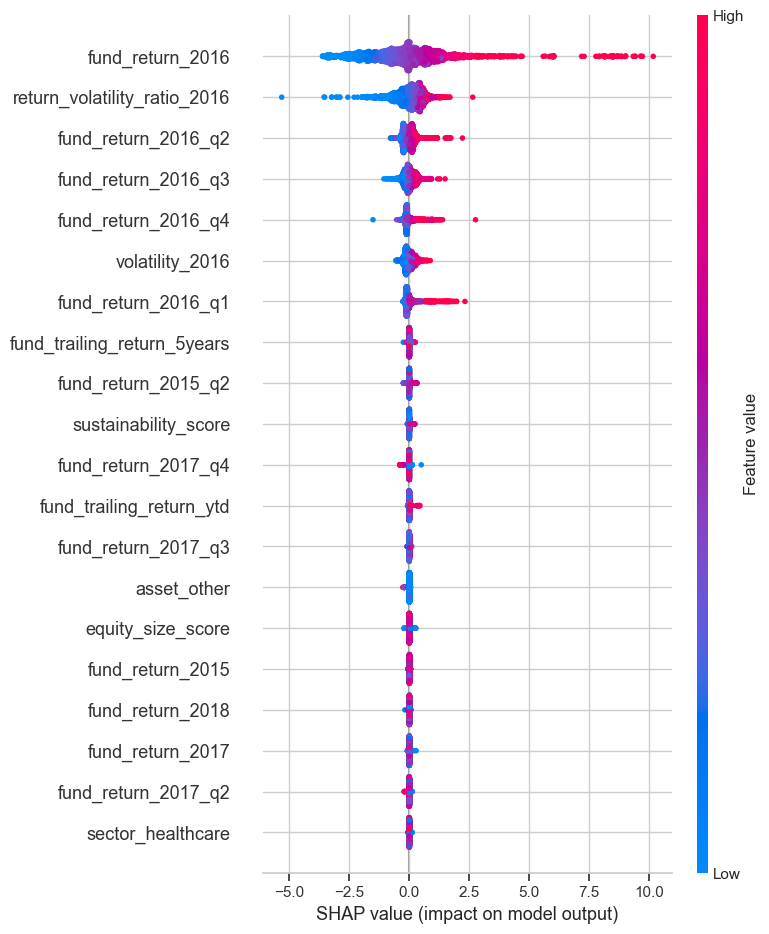

In [79]:
import shap

# Create SHAP explainer for XGBoost
explainer = shap.Explainer(xgb_tuned)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# SHAP summary plot (bar + beeswarm)
shap.summary_plot(shap_values, X_test)


###  Perform KMeans Clustering and Visualize Fund Segments
This cell applies **KMeans clustering** to segment mutual funds into three distinct groups based on their risk-return characteristics:

- It uses `avg_quarterly_return_2016`, `volatility_2016`, and `return_volatility_ratio_2016` as features for clustering.
- **StandardScaler** is used to standardize the features before fitting the KMeans model.
- **Clusters** are assigned to each fund, and a new column `Cluster` is added to the DataFrame to label each fund.
- The scatter plot visualizes the clusters, where each fund is colored according to its assigned group: Aggressive, Balanced, or Conservative.

This segmentation helps categorize funds into actionable investment profiles based on their risk-return behaviors.


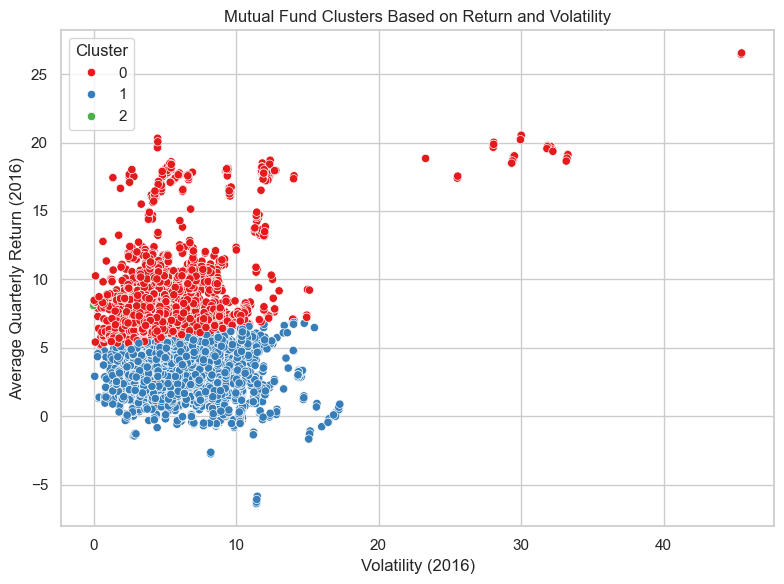

In [80]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
cluster_features = df[['avg_quarterly_return_2016', 'volatility_2016', 'return_volatility_ratio_2016']]

# Standardize the features
scaler = StandardScaler()
scaled_cluster_data = scaler.fit_transform(cluster_features)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_cluster_data)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='volatility_2016',
    y='avg_quarterly_return_2016',
    hue='Cluster',
    palette='Set1',
    data=df
)
plt.title("Mutual Fund Clusters Based on Return and Volatility")
plt.xlabel("Volatility (2016)")
plt.ylabel("Average Quarterly Return (2016)")
plt.tight_layout()
plt.show()


###  Label Clusters and Count Funds by Risk Profile
This cell assigns readable labels to the clusters based on their risk-return characteristics:

- The function `label_cluster()` maps each cluster to a risk profile:
  - **Cluster 0**: Aggressive
  - **Cluster 1**: Balanced
  - **Cluster 2**: Conservative
- A new column `Risk_Profile` is added to the DataFrame with the labeled categories.
- The distribution of funds across the three profiles is counted and displayed in a table.

This helps categorize the funds into distinct investment profiles, which can be useful for portfolio construction or investor recommendations.


In [81]:
# Assign readable labels to clusters based on interpretation
def label_cluster(row):
    if row['Cluster'] == 0:
        return 'Aggressive'
    elif row['Cluster'] == 1:
        return 'Balanced'
    else:
        return 'Conservative'

# Create new column with labels
df['Risk_Profile'] = df.apply(label_cluster, axis=1)

# Count funds per profile
profile_counts = df['Risk_Profile'].value_counts().reset_index()
profile_counts.columns = ['Risk Profile', 'Number of Funds']

# Display count of each fund type
profile_counts


,Risk Profile,Number of Funds
0,Balanced,7716
1,Aggressive,5680
2,Conservative,2
